In [1]:
import numpy as np

from matplotlib import pyplot as plt

import tempfile
import os
import shutil
import glob
import xarray as xr
import netCDF4

import shapely
import pyart
from tint import Cell_tracks
import pandas as pd
import datetime

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D   

from shapely.geometry import Polygon, Point, MultiPoint
from trackedcell_info import max_cell_area, ds_cell_1time, max_cell_edges, ds_celledges_1time

# import sys
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
import skimage.measure
import skimage.color


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
def idx_win_cell(edge):
    # Given cell edges, return the idx point grid within them 
    cell_poly_grid = Polygon(edge)

    grid_x = np.meshgrid(np.arange(401), np.arange(401))[0].flatten()
    grid_y = np.meshgrid(np.arange(401), np.arange(401))[1].flatten()

    # -- Radar centers inside cell shape
    radar_shp = MultiPoint(tuple(np.vstack((grid_x, grid_y)).transpose()))
    XRAD = [] 
    YRAD = []
    for i in np.arange(len(grid_x)):
        if cell_poly_grid.contains(radar_shp[i]) == True:
            XRAD.append(np.asarray(radar_shp[i].coords[0])[0])
            YRAD.append(np.asarray(radar_shp[i].coords[0])[1])
    XRAD = np.asarray(XRAD, dtype='int')
    YRAD = np.asarray(YRAD, dtype='int')

    return XRAD,YRAD

In [3]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

## TRACK

In [4]:
filenames = sorted(glob.glob('/home/jessica/tracer/KHGX20170806_*c_grid.nc'))
print(len(filenames))
grids = (pyart.io.read_grid(fn) for fn in filenames)
# No rhohv in july
# - 12 jul 2017 - [:38] [38:] 15h - 18h, 19h - 23h  2 , 24
# - 13 jul 2017 - [:42] [42:]  10,28
# - 17 jul 2017 - all scans 1,4
# - 18 jul 2017 - sem cell isolada 0,25
# - 19 jul 2017 - [:25][25:] 2,14
# - 21 jul 2017 - all scans 1,5
# - 26 jul 2017 - all scans 0,13
# 30 jul 2017 - 0,2

# - AGO
# 03/08 - 18h30 - 23 0,7
# 04/08 - 19h - 23h59  0,3
# 05/08 - 11h - 21h  0,15
# 06/08 - 15h - 21h - 2,23
# 09/08 - 01h - 14h, 15h - 18h30, 20h30 - 22h30  
# 10/08 - 14h30 - 23h59  0,12
# 11/08 - 15h - 23h  1,21
# 20/08 - 17h - 21h  1,5
# 21/08 - 13h - 15h30  0,1
# 22/08 - 15h - 22h  2,5
# 23/08 - 11h - 23h59     0,16
# 24/08 - 07h - 16h, 18h - 23h59   0,12

filenames

75


['/home/jessica/tracer/KHGX20170806_150102_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_150414_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_150727_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_151039_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_151536_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_151848_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_152216_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_152543_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_153040_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_153521_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_153948_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_154400_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_154826_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_155323_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_155820_V06_proc_grid.nc',
 '/home/jessica/tracer/KHGX20170806_160318_V06_proc_grid.nc',
 '/home/

In [5]:
# Now we can easily instantiate generators of these grids like so
grids = (pyart.io.read_grid(fn) for fn in filenames)

# First, let's instantiate a tracks object and view the default parameters
tracks_obj = Cell_tracks()
tracks_obj.params

# The cells we're interested in look a bit small. Let's reduce the minimum size threshold.
# tracks_obj.params
tracks_obj.params['GS_ALT'] = 3000
# We'll give the generator of grids we made earlier to the get_tracks method of our tracks object.
tracks_obj.get_tracks(grids)

Writing tracks for scan 0
Writing tracks for scan 1
Writing tracks for scan 2
Writing tracks for scan 3
Writing tracks for scan 4
Writing tracks for scan 5
Writing tracks for scan 6
Writing tracks for scan 7
Writing tracks for scan 8
Writing tracks for scan 9
Writing tracks for scan 10
Writing tracks for scan 11
Writing tracks for scan 12
Writing tracks for scan 13
Writing tracks for scan 14
Writing tracks for scan 15
Writing tracks for scan 16
Writing tracks for scan 17
Writing tracks for scan 18
Writing tracks for scan 19
Writing tracks for scan 20
Writing tracks for scan 21
Writing tracks for scan 22
Writing tracks for scan 23
Writing tracks for scan 24
Writing tracks for scan 25
Writing tracks for scan 26
Writing tracks for scan 27
Writing tracks for scan 28
Writing tracks for scan 29
Writing tracks for scan 30
Writing tracks for scan 31
Writing tracks for scan 32
Writing tracks for scan 33
Writing tracks for scan 34
Writing tracks for scan 35
Writing tracks for scan 36
Writing tra

In [6]:
# cells that were tracked for the most frames
most_freq = tracks_obj.tracks.groupby(level='uid').size().sort_values(ascending=False)[:100].index

# - Cell centroid within the limits at least once
cid_idx1 = []
for freq in np.arange(len(most_freq)):
    cid = freq
    grids_cx = tracks_obj.tracks.xs(most_freq[cid], level='uid').grid_x.values
    grids_cy = tracks_obj.tracks.xs(most_freq[cid], level='uid').grid_y.values
    if (((grids_cx < 300.) & (grids_cy < 300.) & (grids_cx > 100.) & (grids_cy > 100.)).any() == True):
#         print(cid)
        cid_idx1.append(cid)
cid_idx1 = np.asarray(cid_idx1)

cid_idx2 = []
# - Cell survives for at least 5 (2) scans
for n in np.arange(len(cid_idx1)):
    if len(tracks_obj.tracks.xs(most_freq[cid_idx1[n]], level='uid'))>2:
        cid_idx2.append(cid_idx1[n])

cid_idx3 = []
# - Cell is isolated
for n in np.arange(len(cid_idx2)):
    if (tracks_obj.tracks.xs(most_freq[cid_idx1[n]], level='uid').isolated.values).all() == True:
        cid_idx3.append(cid_idx2[n])
isolated=True

## CELL: CONTENTS AND LIMITS

In [7]:
nb = 0 # number for the scan index
cid = cid_idx3[nb]
# Track scan number
nscans = tracks_obj.tracks.xs(most_freq[cid_idx3[nb]], level='uid').index.values

# - change x and y
cgridx = np.array(tracks_obj.tracks.xs(most_freq[cid], level='uid').grid_x.values,'i')
cgridy = np.array(tracks_obj.tracks.xs(most_freq[cid], level='uid').grid_y.values,'i')

In [8]:
# - All the data for the cell
total_data = xr.open_dataset(filenames[nscans[0]])
for i in np.arange(1,len(nscans)):
    data = xr.open_dataset(filenames[nscans[i]])
    total_data = xr.combine_by_coords([total_data, data])
    
dict_cell = my_dictionary() 
dict_keys = ['edges'+str(x) for x in range(len(nscans) + 1)]

In [9]:
nlevel = 6
# ntime = 1
for ntime in np.arange(len(nscans)):
    blobs = total_data['reflectivity'].values[ntime,nlevel,:,:].copy()
    blobs = np.nan_to_num(blobs, 0)
    thres = 5
    blobs[np.where(blobs < thres)[0],np.where(blobs < thres)[1]] = 0
    blobs[np.where(blobs >= thres)[0],np.where(blobs >= thres)[1]] = 2
    # Perform CCA on the mask
    labeled = skimage.measure.label(blobs, connectivity=2, return_num=True)

    # labeled[cgridx,cgridy]
    trk = labeled[0][cgridy[ntime],cgridx[ntime]]

    for i in np.arange(np.shape(skimage.measure.regionprops(labeled[0]))[0]):
        if (skimage.measure.regionprops(labeled[0])[i].label == trk):
            trk_pop = i
            print(i)

    shape = skimage.measure.regionprops(labeled[0])[trk_pop].coords

    edge = []
    for i in np.arange(np.shape(skimage.measure.find_contours(blobs, level=1))[0]):
        verts = skimage.measure.find_contours(blobs, level=1)[i]
        edge.append(np.shape(np.where(skimage.measure.points_in_poly(shape, verts)==True)[0])[0])

    trk_per = np.where(np.array(edge) == np.array(edge).max())[0][0]

    edges = skimage.measure.find_contours(blobs, level=1)[trk_per]
    edges = np.round(edges, 0)+0.5
    edges = edges.astype('int') #### fix 
    
    radar = pyart.io.read_grid(filenames[nscans[ntime]])
    edge_lon = radar.get_point_longitude_latitude(level = 0, edges = 'True')[0][edges[:,0], edges[:,1]]
    edge_lat = radar.get_point_longitude_latitude(level = 0, edges = 'True')[1][edges[:,0], edges[:,1]]
    time_center = tracks_obj.tracks.xs(most_freq[cid], level='uid').time.values[ntime]
        
    XRAD,YRAD = idx_win_cell(edges)
    center_lon = radar.get_point_longitude_latitude(level = 0, edges = 'True')[0][XRAD,YRAD]
    center_lat = radar.get_point_longitude_latitude(level = 0, edges = 'True')[1][XRAD,YRAD]
    ref = total_data['reflectivity'][ntime,:,XRAD,YRAD].values
    zdr = total_data['differential_reflectivity'][ntime,:,XRAD,YRAD].values
    kdp = total_data['KDP_CSU'][ntime,:,XRAD,YRAD].values
    rhohv = total_data['cross_correlation_ratio'][ntime,:,XRAD,YRAD].values
#     phidp = total_data['differential_phase'][ntime,:,XRAD,YRAD].values
    d0 = total_data['D0'][ntime,:,XRAD,YRAD].values
    nw = total_data['NW'][ntime,:,XRAD,YRAD].values
    mu = total_data['MU'][ntime,:,XRAD,YRAD].values
    mw = total_data['MW'][ntime,:,XRAD,YRAD].values
    mi = total_data['MI'][ntime,:,XRAD,YRAD].values

    dict_cell.add(dict_keys[ntime], [edges, edge_lon, edge_lat, time_center,
                                     center_lon, center_lat,
                                     ref, zdr, kdp, 
                                     rhohv,
                                     d0, nw, mu, mw, mi])

165
149
148
155
153
165
157
142


In [10]:
largest_area = max_cell_area(dict_cell, ntime+1)
largest_edges = max_cell_edges(dict_cell, ntime+1)

# cell's dataset
ds = ds_cell_1time(dict_cell, largest_area, nt=0)
for i in np.arange(1,ntime+1):
    ds1 = ds_cell_1time(dict_cell, largest_area, nt=i)
    ds = xr.concat((ds,ds1),dim="time")
# edges dataset
dse = ds_celledges_1time(dict_cell, largest_edges, nt=0)
for i in np.arange(1,ntime+1):
    dse1 = ds_celledges_1time(dict_cell, largest_edges, nt=i)
    dse = xr.concat((dse,dse1),dim="time")

if isolated==True:
    path = filenames[0][:-17]+'_cell'+str(cid).zfill(3)+'_'+str(ntime).zfill(2)+'times_yisolated_ds_track.nc'
    pathe = filenames[0][:-17]+'_celledges'+str(cid).zfill(3)+'_'+str(ntime).zfill(2)+'times_yisolated_ed_track.nc'
else:
    path = filenames[0][:-17]+'_cell'+str(cid).zfill(3)+'_'+str(ntime).zfill(2)+'times_nisolated_ds_track.nc'
    pathe = filenames[0][:-17]+'_celledges'+str(cid).zfill(3)+'_'+str(ntime).zfill(2)+'times_nisolated_ed_track.nc'

for var in ds.variables:
    if len(ds[var].dims) >= 2:
        ds[var].encoding['zlib']=True
        ds[var].encoding['complevel']=5
        
for var in dse.variables:
    if len(dse[var].dims) >= 2:
        dse[var].encoding['zlib']=True
        dse[var].encoding['complevel']=5
    
ds.to_netcdf(path)
dse.to_netcdf(pathe)

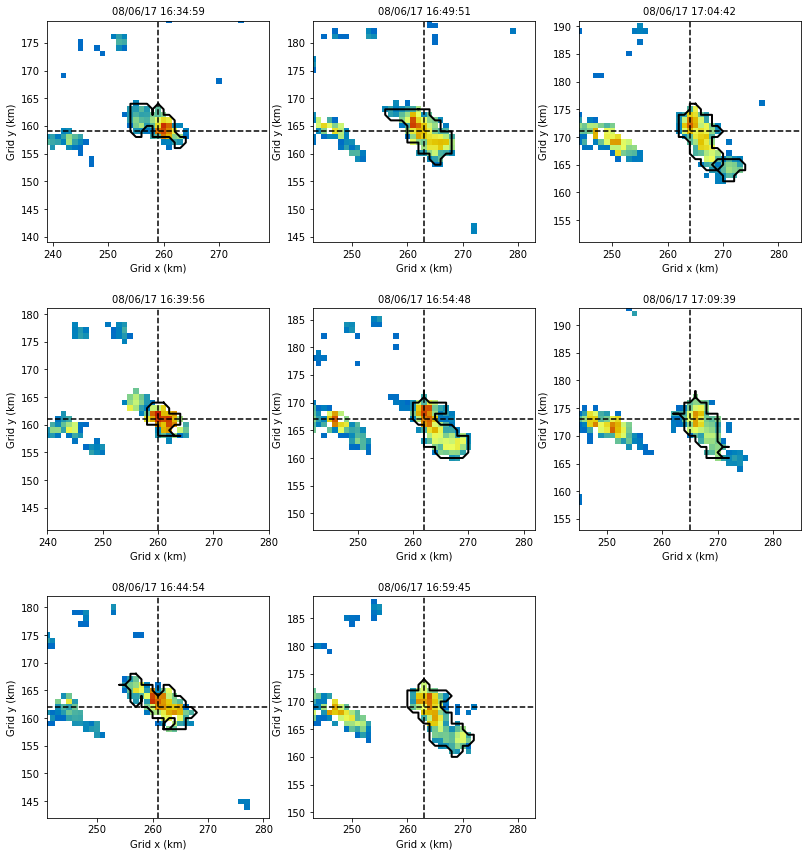

In [11]:
ncol = 3
nrow = int(np.round(len(nscans)/3))
##
k = 0
tti = datetime.datetime.utcfromtimestamp(total_data['time'].values[k].tolist()/1e9)
fig = plt.figure(figsize=[ncol*4.5,nrow*5])
for c in np.arange(ncol):
    for r in np.arange(nrow):
        ix = r*ncol + c
        ax = plt.subplot(nrow,ncol,ix+1)
        plt.imshow(total_data['reflectivity'].values[k,6,:,:], origin = 'lower', cmap = 'pyart_HomeyerRainbow', vmin = 0, vmax = 60)
        plt.plot(dict_cell[dict_keys[k]][0][:,1],dict_cell[dict_keys[k]][0][:,0],
                 linewidth = 2, c = 'black')
        
        zoom = 20
        plt.hlines(cgridy[k],cgridx[k] - zoom,cgridx[k] + zoom, color='black',linestyle='dashed')
        plt.vlines(cgridx[k],cgridy[k] - zoom,cgridy[k] + zoom, color='black',linestyle='dashed')

        plt.ylim(cgridy[k] - zoom, cgridy[k] + zoom)
        plt.ylabel('Grid y (km)')
        plt.xlim(cgridx[k] - zoom, cgridx[k] + zoom)
        plt.xlabel('Grid x (km)')
        plt.title(total_data['time'].values[k],fontsize = 5)
        tt = datetime.datetime.utcfromtimestamp(total_data['time'].values[k].tolist()/1e9)
        plt.title(tt.strftime("%m/%d/%y %H:%M:%S"),fontsize = 10)
        k=k+1
        if k == len(nscans):
            break